# dHybridR Example Notebook

#### Here we provide an example of what a typical analysis notebook will look like when computing velocity space signatures and generating MLA algo data will look like

In [1]:
import lib.loadfunctions as lf 
import lib.analysisfunctions as af
import lib.plotfunctions as pf
import lib.savefunctions as svf
import lib.sanityfunctions as sanf
import lib.fieldtransformfunctions as ftf

import os
import math
import numpy as np

In [2]:
#block to reload modules. Call this block after editing libraries
import importlib
importlib.reload(lf)
importlib.reload(af)
importlib.reload(pf)
importlib.reload(svf)
importlib.reload(sanf)
importlib.reload(ftf)

<module 'lib.fieldtransformfunctions' from '/Users/collbrown/Documents/OneDrive - University of Iowa/Research/DHybridR/analysistools/dHybridRAnalysis/lib/fieldtransformfunctions.py'>

### Load data

In [3]:
#variables related to loading
path = "run0/"
path_fields = "run0/"
path_particles = "run0/Output/Raw/Sp01/raw_sp01_{:08d}.h5"
numframe = 1000


In [ ]:
import time
start = time.time()
dparticles3veltest = lf.readSliceOfParticles(path_particles, numframe, 1, 3, 1, 3, 1, 3)
end = time.time()
print("Time consumed in loading: ",end - start)


In [ ]:
sizetotal = getsizeof(dparticles3veltest)
sizetotal /= 1073741824 #convert to mb
    
print('size of data: ' + str(sizetotal) + ' gb')

In [4]:
#load fields
dfields = lf.field_loader(path=path_fields,num=numframe)

#load particle data
dparticles = lf.readParticlesPosandVelocityOnly(path_particles, numframe)

#load flow data
dflow = lf.flow_loader(path=path,num=numframe)

### Plot fields, particle dist function, and flow
#### used as a sanity check on the data

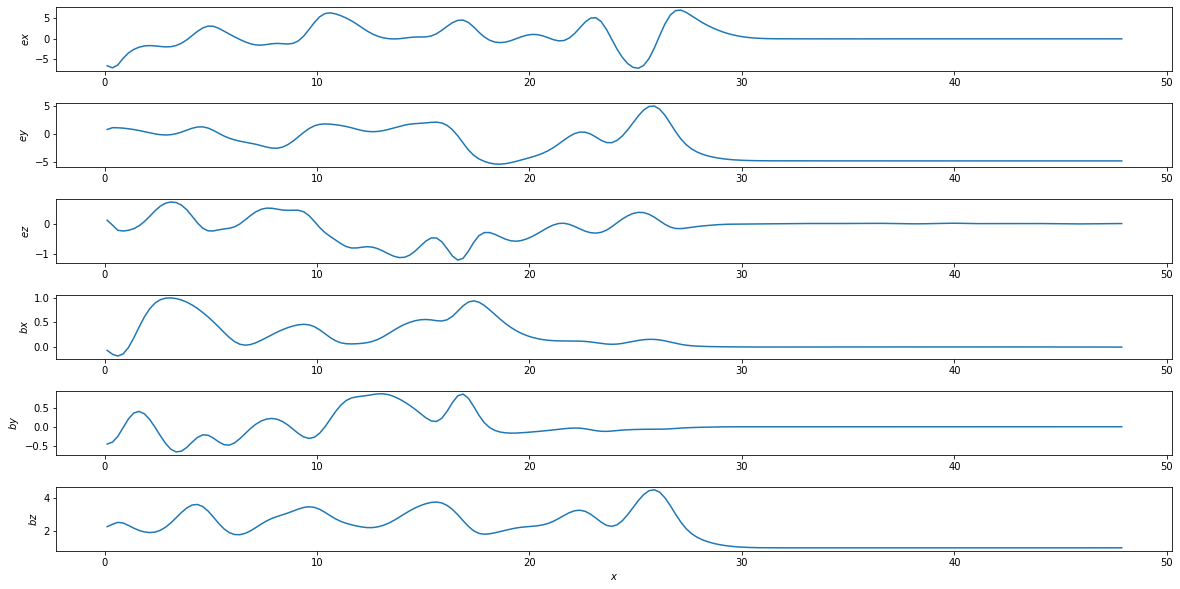

In [5]:
pf.plot_all_fields(dfields, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

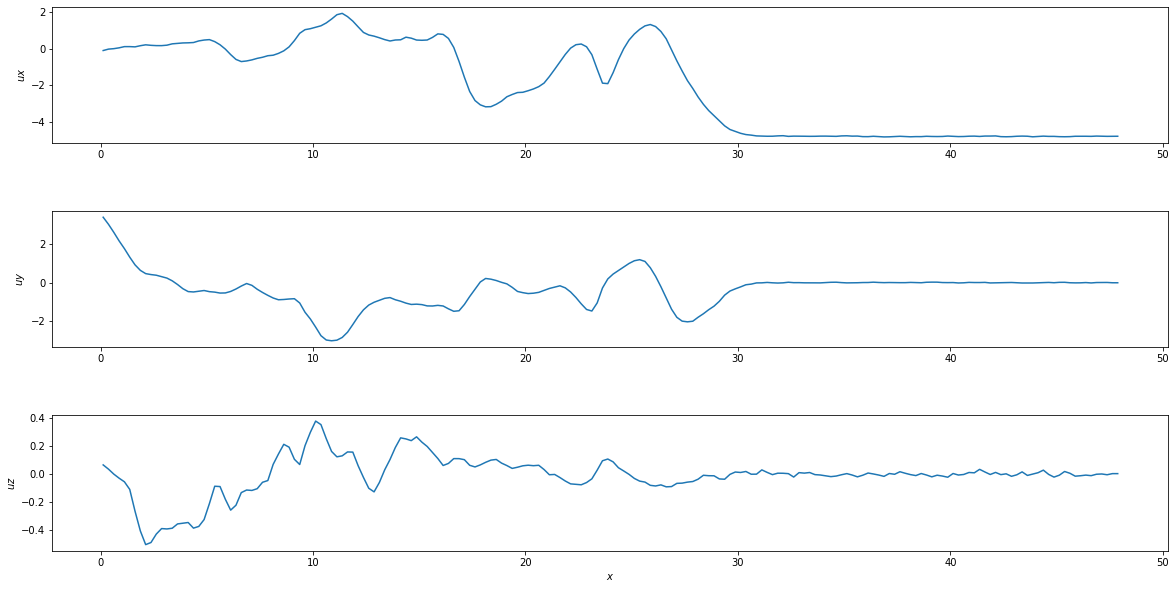

In [6]:
pf.plot_all_flow(dflow, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

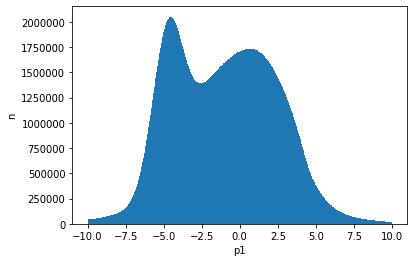

<Figure size 432x288 with 0 Axes>

In [7]:
pf.plot_1d_dist(dparticles, 'p1', 10., dfields['ex_xx'][0], dfields['ex_xx'][-1],dfields['ex_yy'][0], dfields['ex_yy'][-1])

### Compute Shock Vel and Lorentz transform fields

In [8]:
#pick some point in the middle of the simulation and plot it as a function of time
all_dfields = lf.all_dfield_loader(path=path_fields, verbose=False)


In [9]:
vshock, xshockvals = af.shock_from_ex_cross(all_dfields)

Warning, using dt = 0.01 Omega^-1... TODO: automate loading this...


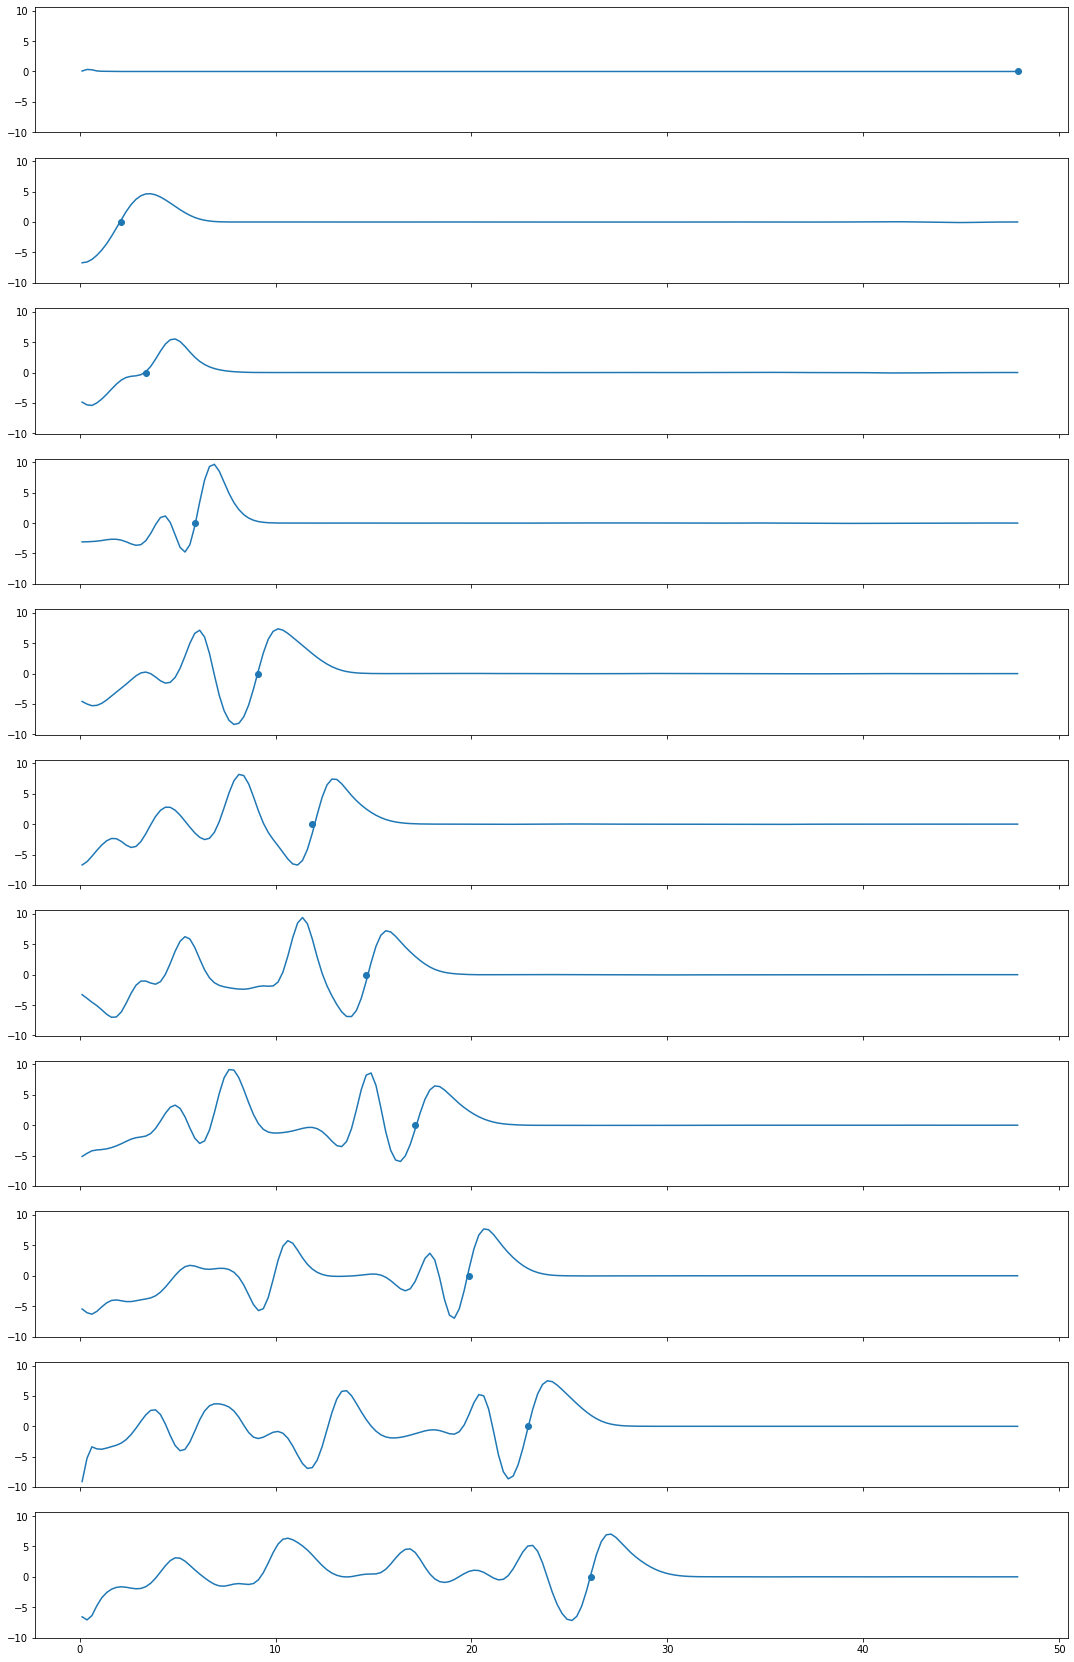

In [10]:
pf.stack_line_plot(all_dfields,'ex',xshockvals = xshockvals)

In [13]:
#Lorentz transform fields
dfields = ftf.lorentz_transform_vx(dfields,vshock)
_fields = []
for k in range(0,len(all_dfields['dfields'])):
    _fields.append(ftf.lorentz_transform_vx(all_dfields['dfields'][k],vshock))
all_dfields['dfields'] = _fields

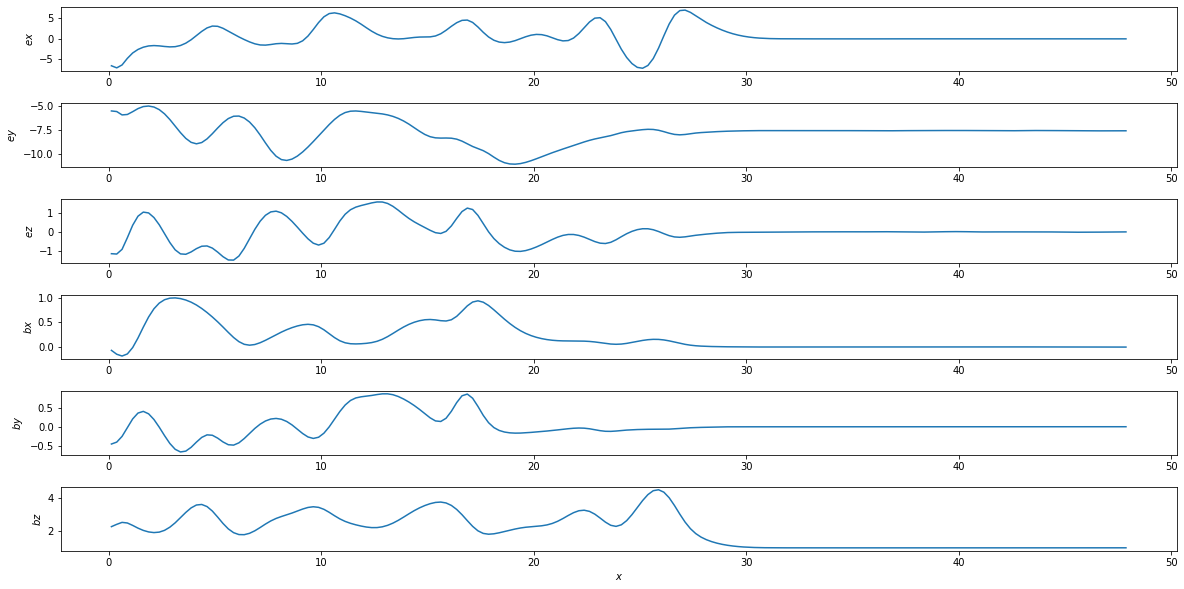

In [14]:
pf.plot_all_fields(dfields, axis='_xx', xxindex = 0, yyindex = 0, zzindex = 0)

### Determine where shock is
#### want to figure out the x range of the shock and assign correct metadata values

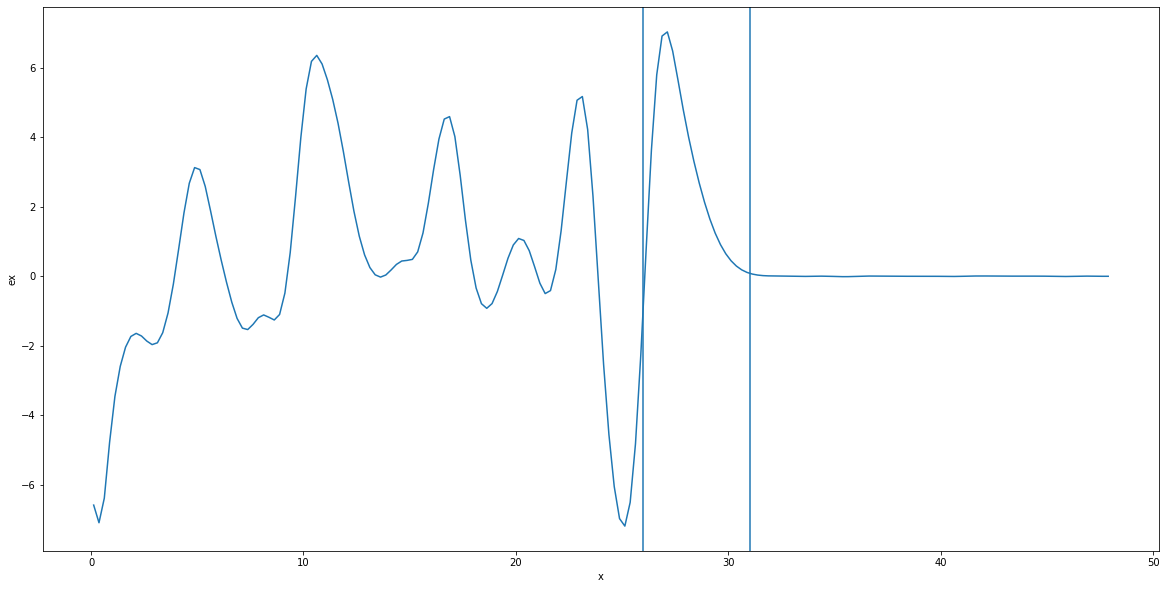

In [17]:
#Use this block to determine start and end val
#by editing startval and endval and replotting until bounds are correct
startval = 26.#lower bound for metadata = 1 (di)
endval = 31. #upper bound for metadata = 1 (di)

yyindex = 0
zzindex = 0
pf.plot_field(dfields, 'ex', axis='_xx', yyindex = yyindex, zzindex = zzindex, axvx1 = startval, axvx2 = endval)

In [18]:
metadata = svf.build_metadata(dfields, startval, endval)

In [19]:
metadata

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Perform FPC analysis

In [20]:
#Define parameters related to analysis
vmax = 15.0
dv = 0.25
dx = dfields['ex_xx'][1]-dfields['ex_xx'][0] #assumes rectangular grid thats uniform for all fields

In [109]:
CEx_out, CEy_out, x_out, Hxy_out, vx_out, vy_out = af.compute_correlation_over_x(dfields, dparticles, vmax, dv, dx, vshock)

0.125 of 47.875
0.375 of 47.875
0.625 of 47.875
0.875 of 47.875
1.125 of 47.875
1.375 of 47.875
1.625 of 47.875
1.875 of 47.875
2.125 of 47.875
2.375 of 47.875
2.625 of 47.875
2.875 of 47.875
3.125 of 47.875
3.375 of 47.875
3.625 of 47.875
3.875 of 47.875
4.125 of 47.875
4.375 of 47.875
4.625 of 47.875
4.875 of 47.875
5.125 of 47.875
5.375 of 47.875
5.625 of 47.875
5.875 of 47.875
6.125 of 47.875
6.375 of 47.875
6.625 of 47.875
6.875 of 47.875
7.125 of 47.875
7.375 of 47.875
7.625 of 47.875
7.875 of 47.875
8.125 of 47.875
8.375 of 47.875
8.625 of 47.875
8.875 of 47.875
9.125 of 47.875
9.375 of 47.875
9.625 of 47.875
9.875 of 47.875
10.125 of 47.875
10.375 of 47.875
10.625 of 47.875
10.875 of 47.875
11.125 of 47.875
11.375 of 47.875
11.625 of 47.875
11.875 of 47.875
12.125 of 47.875
12.375 of 47.875
12.625 of 47.875
12.875 of 47.875
13.125 of 47.875
13.375 of 47.875
13.625 of 47.875
13.875 of 47.875
14.125 of 47.875
14.375 of 47.875
14.625 of 47.875
14.875 of 47.875
15.125 of 47.875
15.

### Compute energization from correlations

In [133]:
enerCEx_out = af.compute_energization_over_x(CEx_out,dv)
enerCEy_out = af.compute_energization_over_x(CEy_out,dv)

### Calculate relevant simulation parameters and save as netcdf4

In [124]:
inputdict = svf.parse_input_file(path)

In [125]:
params = svf.build_params(inputdict,numframe)

In [126]:
inputdict

{'': [''],
 'node_conf_node_number(1:3)': [8.0, 6.0, 4.0],
 'time_dt': [0.01],
 'time_niter': [1000.0],
 'time_t0': [0.0],
 'time_stiter': [0.0],
 'time_c': [125.0],
 'grid_space_ncells(1:3)': [192.0, 48.0, 48.0],
 'grid_space_boxsize(1:3)': [48.0, 12.0, 12.0],
 'grid_space_bdtype': ['reflect', 'open', 'per', 'per', 'per', 'per'],
 'grid_space_Te': [1.0],
 'grid_space_gamma': [1.66667],
 'global_output_dodump': ['.true.'],
 'global_output_ndump': [100.0],
 'global_output_B0': ['3.05191d-7'],
 'global_output_n0': ['1.d6'],
 'global_output_units': ['NORM'],
 'global_output_do_restart': ['.false.'],
 'global_output_save_restart': ['.true.'],
 'global_output_restart_step': [1000.0],
 'global_output_restart_time': [85000.0],
 'global_output_restart_time_step': [100.0],
 'ext_emf_Bx': [0.0],
 'ext_emf_By': [0.0],
 'ext_emf_Bz': [1.0],
 'ext_emf_Ex': [0.0],
 'ext_emf_Ey': [0.0],
 'ext_emf_Ez': [0.0],
 'ext_emf_n_constants': [0.0],
 'ext_emf_Jext(1:3)': [0.0, 0.0, 0.0],
 'ext_emf_NoiseLevel(1:

In [127]:
params

{'MachAlfven': -5.0,
 'MachAlfvenNote': 'TODO: compute mach alfven for this run',
 'thetaBn': 90.0,
 'thetaBndesc': 'units of degrees',
 'betaelec': 1.0,
 'betaion': 1.0,
 'simtime': 10.0,
 'simtimedesc': 'units of inverse Omega_{c,i,0}',
 'qi': 1.0,
 'qidesc': 'charge to mass ratio',
 'di': 0.0,
 'didesc': 'TODO: compute ion inertial length',
 'vti': 1.0}

In [146]:
flnm = 'dHybridRSDAtest1newformatwithE.nc'
try:
    svf.savedata(CEx_out, CEy_out, vx_out, vy_out, x_out, enerCEx_out, enerCEy_out, metadata_out = [], params = params, filename = flnm)
except:
    os.system('rm '+flnm)
    svf.savedata(CEx_out, CEy_out, vx_out, vy_out, x_out, enerCEx_out, enerCEy_out, metadata_out = [], params = params, filename = flnm)

Saving data into netcdf4 file


### Load netcdf4
#### Saves time if the correlation over x has already been computed

In [147]:
CEx_in, CEy_in, vx_in, vy_in, x_in, enerCEx_in, enerCEy_in, metadata_in, params_in = svf.load_netcdf4(flnm)

### Make gif

In [35]:
pf.make_velsig_gif(vx_in, vy_in, vmax, CEx_out, 'ex', x_out, 'CExframe1000', 'CExframe1000.gif')

Making plot 0 of 192
Making plot 1 of 192
Making plot 2 of 192
Making plot 3 of 192
Making plot 4 of 192
Making plot 5 of 192
Making plot 6 of 192
Making plot 7 of 192
Making plot 8 of 192
Making plot 9 of 192
Making plot 10 of 192
Making plot 11 of 192
Making plot 12 of 192
Making plot 13 of 192
Making plot 14 of 192
Making plot 15 of 192
Making plot 16 of 192
Making plot 17 of 192
Making plot 18 of 192
Making plot 19 of 192
Making plot 20 of 192
Making plot 21 of 192
Making plot 22 of 192
Making plot 23 of 192
Making plot 24 of 192
Making plot 25 of 192
Making plot 26 of 192
Making plot 27 of 192
Making plot 28 of 192
Making plot 29 of 192
Making plot 30 of 192
Making plot 31 of 192
Making plot 32 of 192
Making plot 33 of 192
Making plot 34 of 192
Making plot 35 of 192
Making plot 36 of 192
Making plot 37 of 192
Making plot 38 of 192
Making plot 39 of 192
Making plot 40 of 192
Making plot 41 of 192
Making plot 42 of 192
Making plot 43 of 192
Making plot 44 of 192
Making plot 45 of 19

<img src="CExframe1000.gif" width="750" align="center">

Making plot 0 of 192
Making plot 1 of 192
Making plot 2 of 192
Making plot 3 of 192
Making plot 4 of 192
Making plot 5 of 192
Making plot 6 of 192
Making plot 7 of 192
Making plot 8 of 192
Making plot 9 of 192
Making plot 10 of 192
Making plot 11 of 192
Making plot 12 of 192
Making plot 13 of 192
Making plot 14 of 192
Making plot 15 of 192
Making plot 16 of 192
Making plot 17 of 192
Making plot 18 of 192
Making plot 19 of 192
Making plot 20 of 192
Making plot 21 of 192
Making plot 22 of 192
Making plot 23 of 192
Making plot 24 of 192
Making plot 25 of 192


KeyboardInterrupt: 

<Figure size 468x432 with 0 Axes>

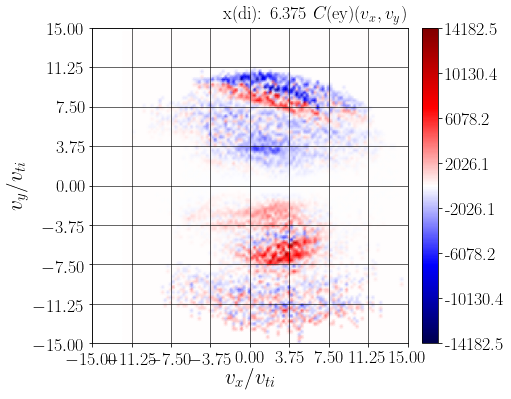

In [37]:
pf.make_velsig_gif(vx_in, vy_in, vmax, CEy_out, 'ey', x_out, 'CEyframe1000', 'CEyframe1000.gif')

<img src="CEyframe1000.gif" width="750" align="center">

### Perform sanity checks
#### E cross B gif

In [ ]:
pf.make_velsig_gif_with_EcrossB(vx_in, vy_in, vmax, CEx_out, 'ex', x_out, dx, dfields, 'CExFrame1000ExB', 'CExFrame1000ExB.gif')

<img src="CExFrame1000ExB.gif" width="750" align="center">

In [ ]:
pf.make_velsig_gif_with_EcrossB(vx_in, vy_in, vmax, CEy_out, 'ey', x_out, dx, dfields, 'CEyFrame1000ExB', 'CEyFrame1000ExB.gif')

<img src="CEyFrame1000ExB.gif" width="750" align="center">

#### Energization vs J dot E

In [ ]:
import matplotlib.pyplot as plt

JdotEarr = []
energizationCExArr = []
energizationCEyArr = []

xsweep = 0.0
for i in range(0,len(dfields['ex_xx'])):
    JdotEarr.append(sanf.calc_JdotE(dfields ,dflow,xsweep, xsweep+dx, dfields['ey_yy'][0], dfields['ey_yy'][1]))
    
    npar = sanf.getnumparticlesinbox(dparticles, xsweep, xsweep+dx, dfields['ey_yy'][0], dfields['ey_yy'][1])
    
    energizationCExArr.append(af.compute_energization(CEx_out[i],dv)/npar)
    energizationCEyArr.append(af.compute_energization(CEy_out[i],dv)/npar)
    print(xsweep) #'quick progress bar'
    xsweep+=dx


In [ ]:
plt.figure()
plt.plot(x_out,JdotEarr,label='J dot E')
plt.plot(x_out,energizationCExArr,label='E(CEx(x; vy, vx))')
plt.plot(x_out,energizationCEyArr,label='E(CEy(x; vy, vx))')
plt.legend()
plt.show()

In [ ]:
plt.figure()
#plt.plot(x_out,JdotEarr,label='J dot E')
plt.plot(x_out,energizationCExArr,label='E(CEx(x; vy, vx))')
plt.plot(x_out,energizationCEyArr,label='E(CEy(x; vy, vx))')
plt.legend()
plt.show()

##  Plot fields as a function of time

In [ ]:
xxpltpoint = 20.0
xxindex =  af.find_nearest(dfields['ex_xx'], xxpltpoint)
pf.plot_field_time(all_dfields, 'ex', xxindex = xxindex, yyindex = 0, zzindex = 0)

## Test alternative get shock vel

In [ ]:
af.shockvel_from_compression_ratio(3)

In [ ]:
dM = 0.01
M = 1.1
shockvelarray = []
Minputarray = []
for k in range(0,1500):
    shockvelarray.append(af.shockvel_from_compression_ratio(M))
    Minputarray.append(M)
    M += dM
    
plt.figure()
plt.plot(Minputarray,shockvelarray)
plt.show()

In [ ]:
def shock(M):
    gamma = 5./3.
    return lambda v: 8./3.*(M-v)**2./(2./3.*(M-v)**2+2.)-M/v

from scipy.optimize import fsolve
fsolve(shock(3),2.)

In [ ]:
temparr = [1,2,3]
temparr = np.asarray(temparr)
temparr

In [ ]:
temparr += 3

In [ ]:
temparr

## Test read analysis input

In [57]:
lf.analysis_input()

('M03', 15.0, 0.25)

## Test slice loader

In [153]:
Arr = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]

In [154]:
np.s_[:,:]

(slice(None, None, None), slice(None, None, None))

In [162]:
np.s_[1:5:10]

slice(1, 5, 10)

In [156]:
_ = [1,2,3,4,5,6]

In [160]:
_[0::3]

[1, 4]

In [183]:
Arr = np.asarray([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])[np.s_[2:4],np.s_[0:1]]
Arr

array([[ 9],
       [13]])

In [170]:
np.s_[1:2,1:2]

(slice(1, 2, None), slice(1, 2, None))

In [181]:
Arr = np.asarray([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])[np.s_[:]]

In [182]:
Arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [193]:
_testmemarr = [1.]
for k in range(0,100000000):
    _testmemarr.append(1.)

In [187]:
_x1temp

NameError: name '_x1temp' is not defined